# Load and prepare

In [1]:
source("~/public/SiyuanLuo/projects/benchmark/scripts/evaluation/lib_metrics.R")
source("~/public/SiyuanLuo/projects/benchmark/scripts/clustering/lib_clustering.R")
source("utils.R")
library(ggpubr)
library(patchwork)


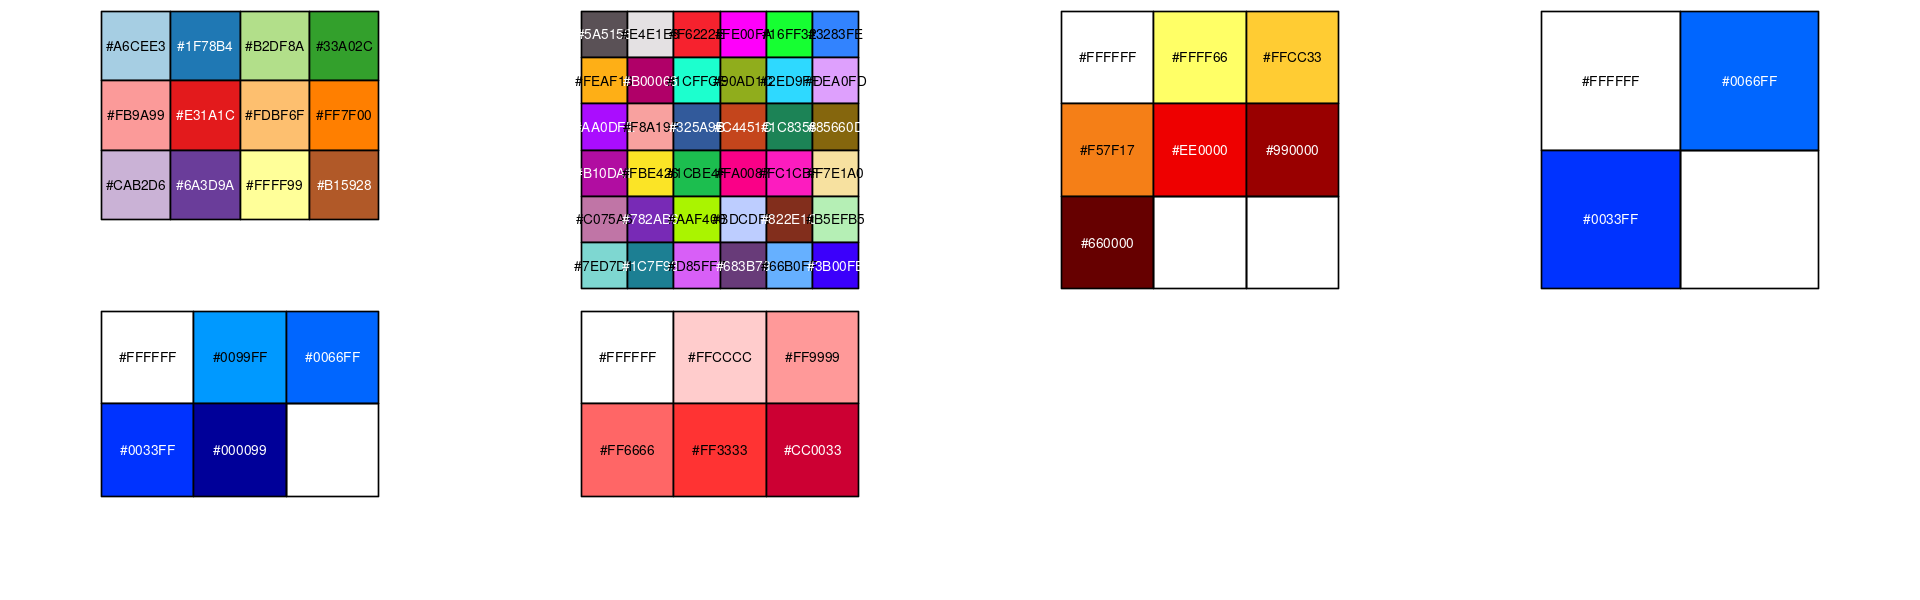

In [2]:
options(repr.plot.width=16, repr.plot.height=5)
par(mfrow=c(2,4))

show_col(my_col_m)
show_col(my_col_c)
show_col(my_color)
show_col(my_color_2)
show_col(my_color_3)
show_col(my_color_4)

In [3]:
dataset_ls <- c("Cell_line_mixing", "candidate1",  "candidate2", "Buenrostro_2018",  "Chen_2019",  "PBMC_multiomics") 
dataset_name <- c("Cell line", "Atlas1", "Atlas2",  "Buenrostro2018", "Chen2019", "10XPBMC")
k_ls <- c(10, 13, 10, 9, 13, 15)

In [4]:
UmapPlot <- function(df, add_clustering=FALSE, s=0.001, names=NA, raster=NULL){
  ps<- list()
  for (i in 1:dim(df)[1]) {
    sobj <- readRDS(df$snn_file[i])
    sobj$ground_truth <- gsub("_", " ", sobj$ground_truth)
    if(add_clustering){
        clustering_file <- df$clustering_file[i]
        sobj <- add_labels(sobj, clustering_file, "barcode", "clusterings")
    }
    if(any(is.na(names))){
      name <- df$long_method[i]
    }else{
      name <- names[i]
    }
    p<- DimPlot(sobj, reduction = "umap", label = F, repel=T, 
        group.by = "ground_truth", cols="polychrome", pt.size=s, raster=raster)  + ggtitle(name)  +
      theme(plot.title = element_text(face = "bold", size=24), 
            text=element_text(size=20), 
            legend.text = element_text(size = 22),
            axis.text = element_text(size = 16)) +
  guides(color = guide_legend(override.aes = list(size = 5)))
    ps[[name]]<- p
  }
  return(ps)
}

In [5]:
file1 <- "../result_files/results_meta_data.tsv"
file2 <- "../result_files/results_all_metrics.tsv"
df <- read.table(file1, sep='\t', header=TRUE)
df_metrics <- read.table(file2, sep='\t', header=TRUE)

In [6]:
df_metrics_best <- df_metrics %>% filter(ndim==15) %>% group_by(dataset, long_method, metric) %>% filter(value==max(value))

In [7]:
root <- "/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/"

# Cell line

In [8]:
df_ds <- df_metrics %>% filter(dataset == "Cell line")

i <- 1
dataset <- dataset_ls[i]
k_optimal <- k_ls[i]

setwd(paste0(root, dataset))

df_umap <- unique(df_ds[,c('method','feature_type','tile_size',
                                  'distance','ndim','long_method',"snn_file")])
rownames(df_umap) <- NULL
dim(df_umap)

[1] 32  7

In [17]:
df_umap

method,feature_type,tile_size,distance,ndim,long_method,snn_file
<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
Signac,by_cluster_peaks,0,default,15,Signac_by_cluster_peaks,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
Signac,all_cell_peaks,0,default,15,Signac_all_cell_peaks,Cell_line_mixing/clustering/Signac/all_cell_peaks/0/default/15/sobj_SNN.RDS
ArchR,tiles,500,default,15,ArchR_tiles,Cell_line_mixing/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS
ArchR,peaks,500,default,15,ArchR_peaks,Cell_line_mixing/clustering/ArchR/peaks/500/default/15/sobj_SNN.RDS
SnapATAC,default,5000,default,15,SnapATAC,Cell_line_mixing/clustering/SnapATAC1/default/5000/default/15/sobj_SNN.RDS
aggregation,default,500,default,15,aggregation,Cell_line_mixing/clustering/aggregation/default/500/default/15/sobj_SNN.RDS
SnapATAC2,default,500,jaccard,15,SnapATAC2_jaccard,Cell_line_mixing/clustering/SnapATAC2/default/500/jaccard/15/sobj_SNN.RDS
SnapATAC2,default,500,cosine,15,SnapATAC2_cosine,Cell_line_mixing/clustering/SnapATAC2/default/500/cosine/15/sobj_SNN.RDS
Signac,by_cluster_peaks,0,default,30,Signac_by_cluster_peaks,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/30/sobj_SNN.RDS


In [9]:
ps <- UmapPlot(df_umap %>% filter(long_method == "SnapATAC2_cosine"), names = paste0("d=", c(15, 30, 50, 100)), s=0.5, raster=TRUE)

Loading required package: Signac



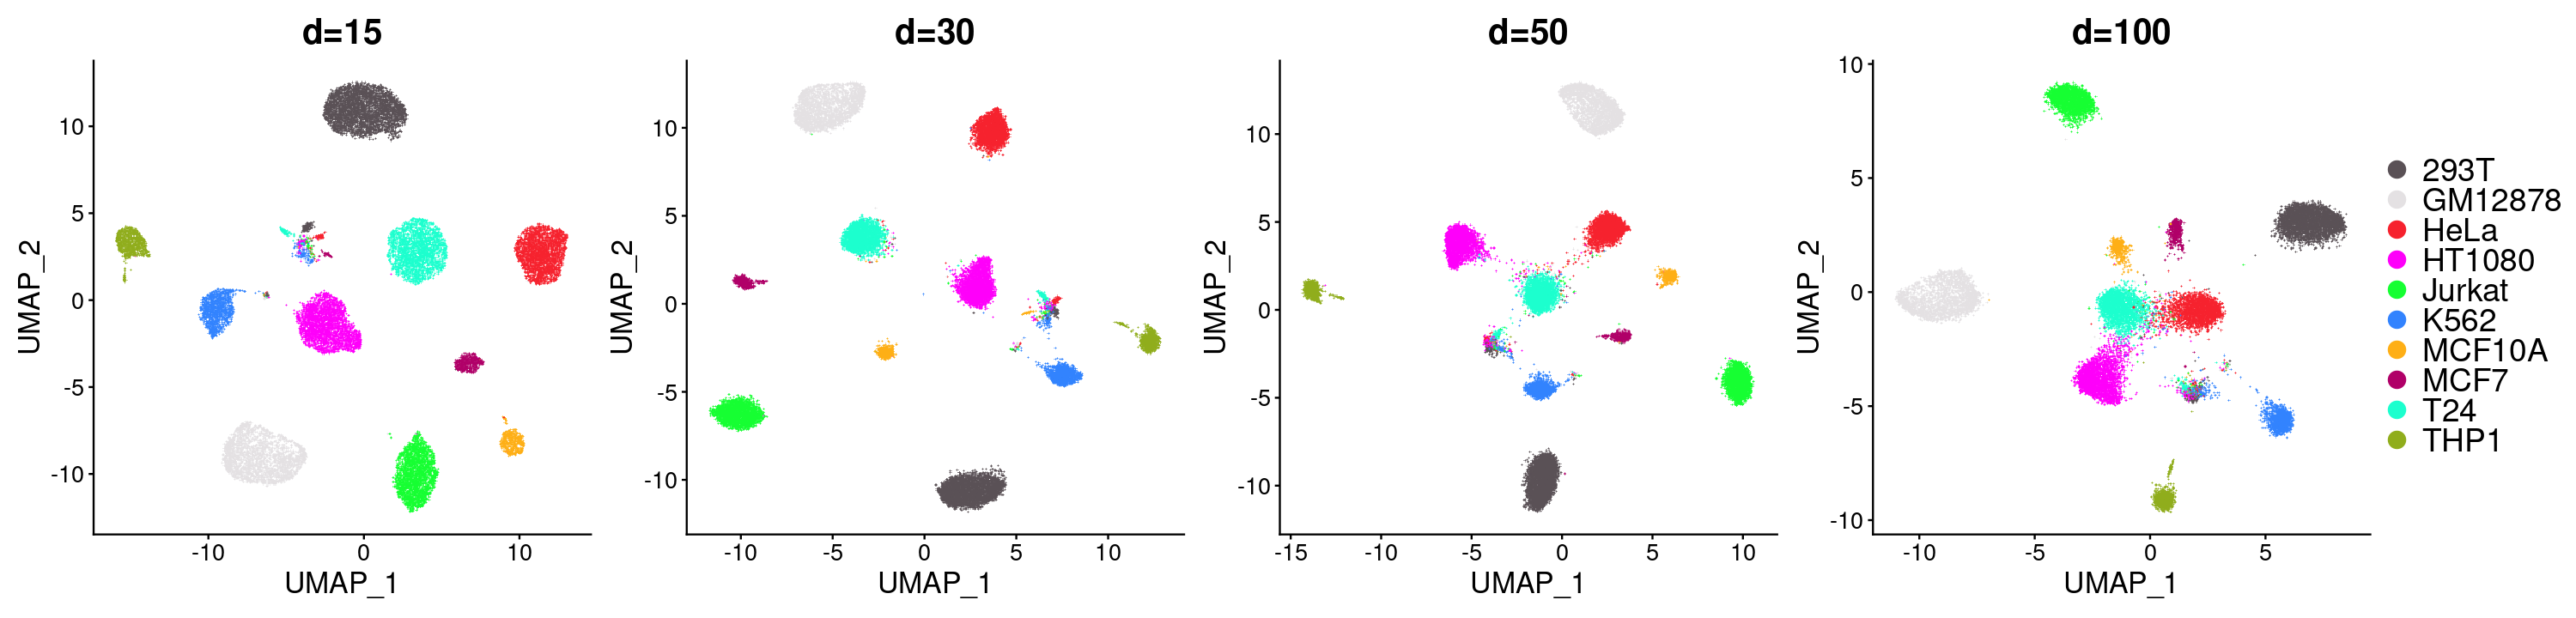

In [13]:
options(repr.plot.width=25, repr.plot.height=6)
layout1<-"
ABCD
"

wrap_plots(ps, guides = 'collect', design = layout1)

In [33]:
pdf("cell_line_SnapATAC2_cosine_allN_umap.pdf", width=25, height=6)
print(wrap_plots(ps ,guides = 'collect', design = layout1))
graphics.off()

In [34]:
ps <- UmapPlot(df_umap %>% filter(long_method == "aggregation"), names = paste0("d=", c(15, 30, 50, 100)), s=0.5, raster=TRUE)

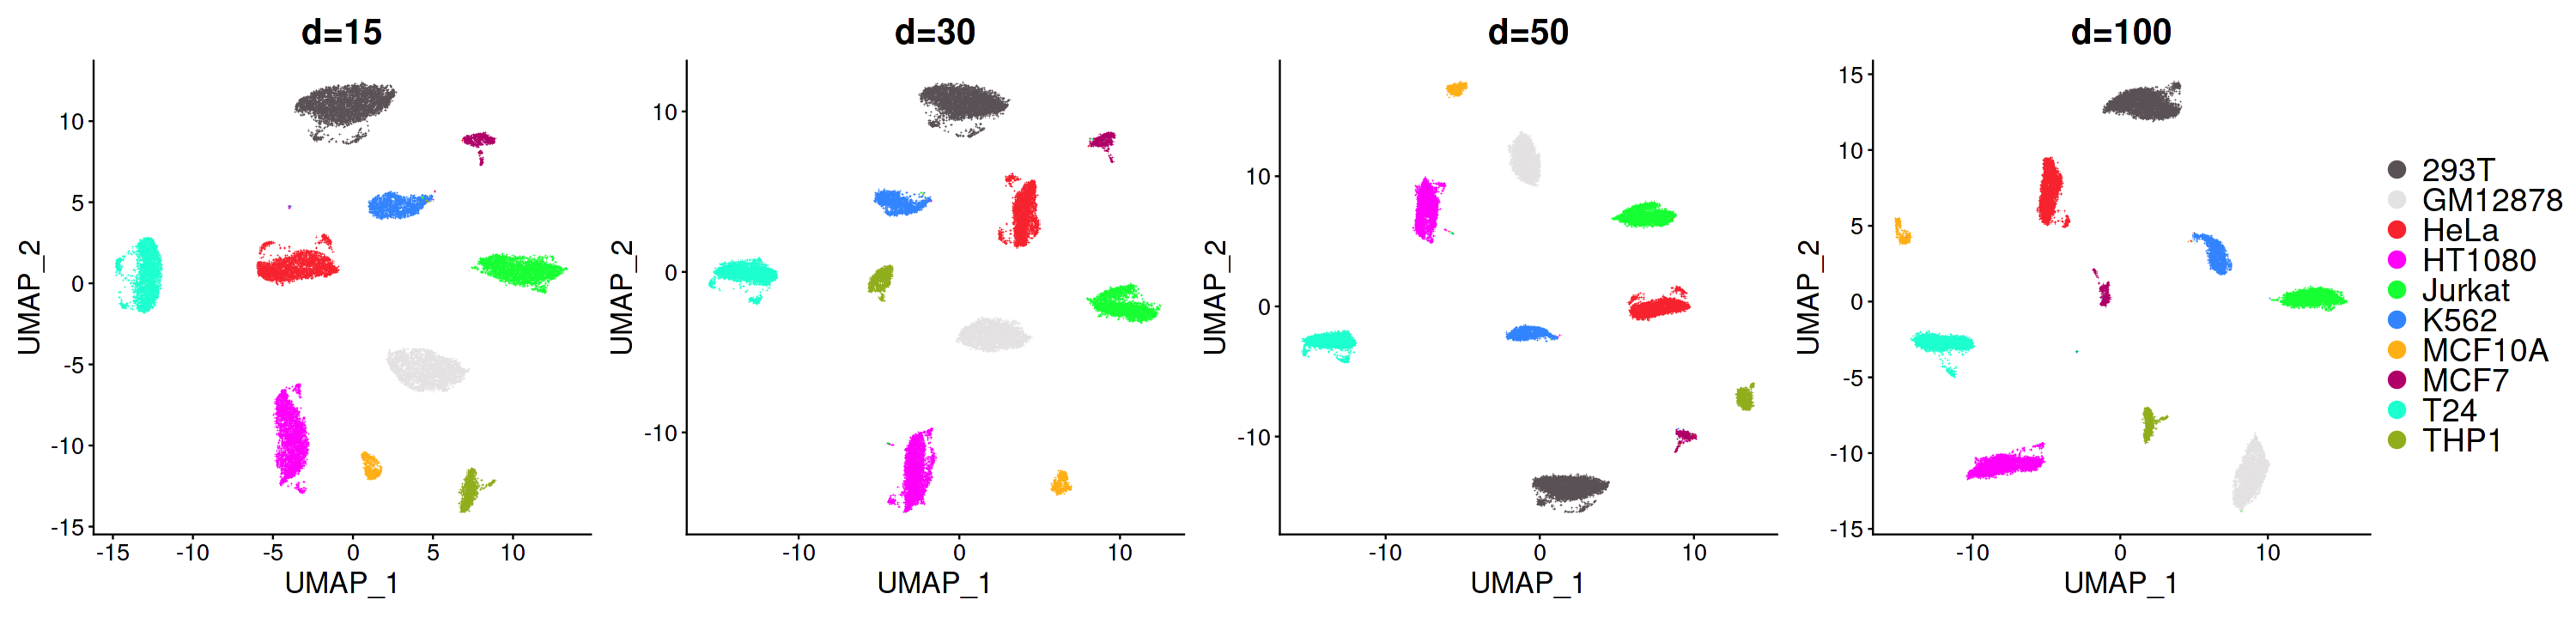

In [35]:
options(repr.plot.width=25, repr.plot.height=6)
layout1<-"
ABCD
"

wrap_plots(ps, guides = 'collect', design = layout1)

In [36]:
pdf("cell_line_agg_allN.pdf", width=25, height=6)
print(wrap_plots(ps ,guides = 'collect', design = layout1))
graphics.off()

In [105]:
ps <- UmapPlot(df_umap %>% filter(ndim == 15))

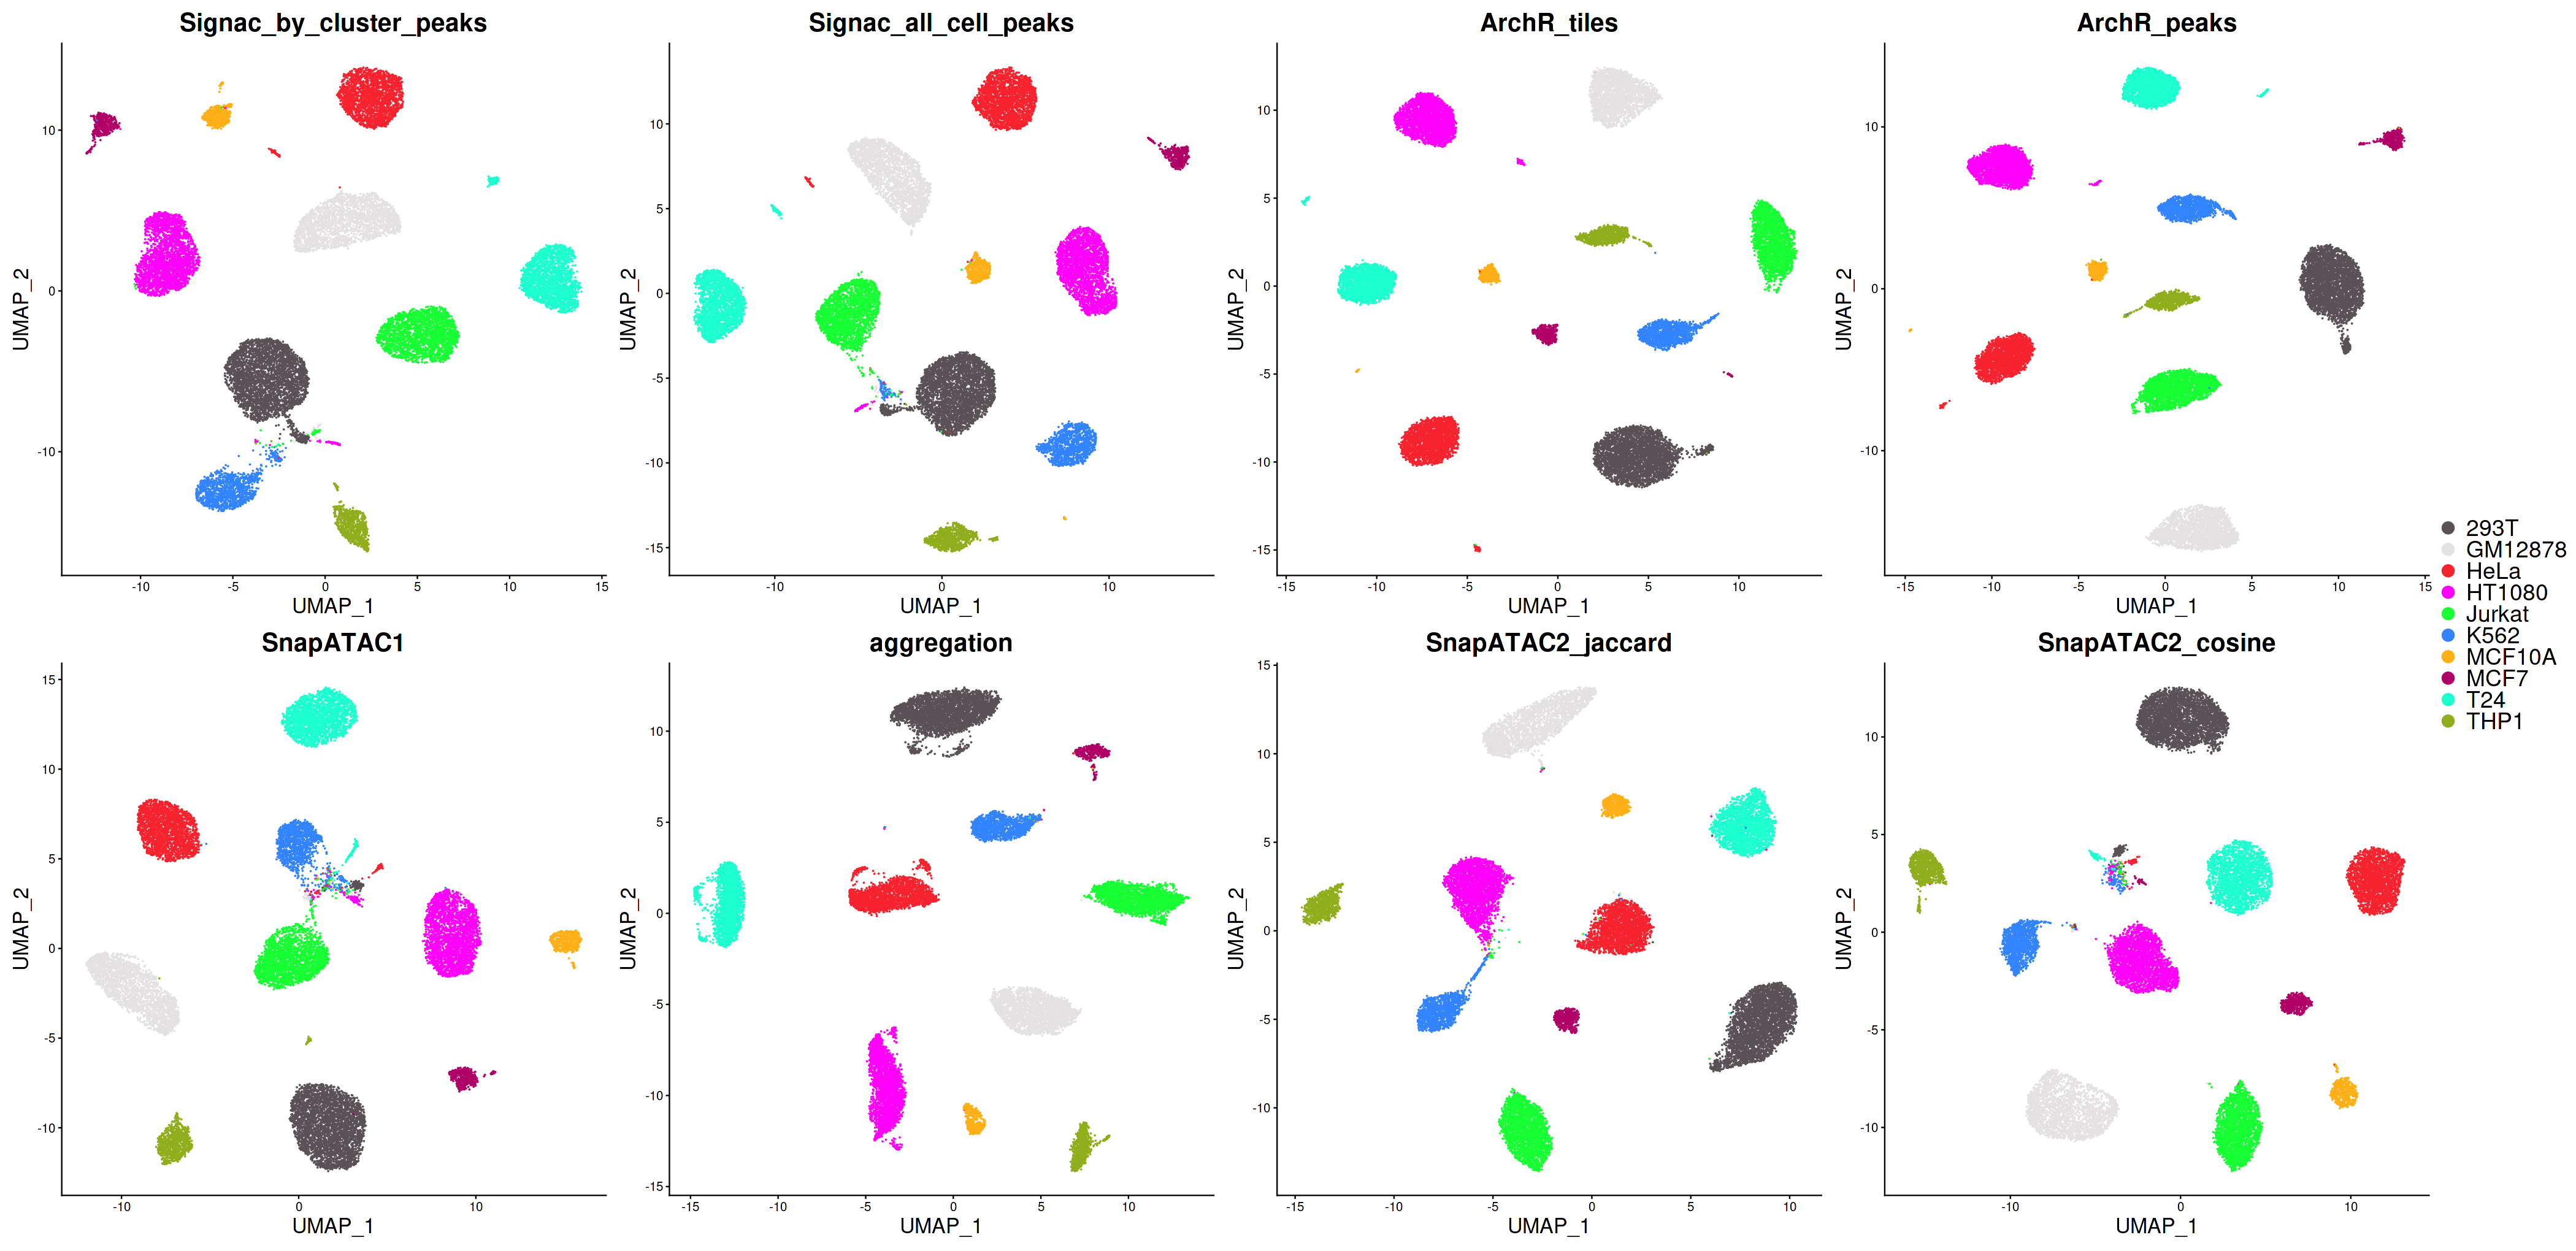

In [107]:
options(repr.plot.width=35, repr.plot.height=17)
layout1<-"
ABCD
EFGH
"

wrap_plots(ps ,guides = 'collect', design = layout1)

In [109]:
pdf("cell_line_n15.pdf", width=35, height=17)
print(wrap_plots(ps ,guides = 'collect', design = layout1))
graphics.off()

In [21]:
df_tmp <- df_metrics_best %>% filter(dataset == "Cell line" & metric == "ARI" )
df_tmp <- df_tmp[!duplicated(df_tmp[, c("long_method")]), ]
df_tmp

n_clusters,metric,value,method,long_method,feature_type,tile_size,distance,ndim,resolution,rds_file,clustering_file,snn_file,seed,dataset,k_optimal,dataset2
<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>
11,ARI,0.9708071,Signac,Signac_by_cluster_peaks,by_cluster_peaks,0,default,15,0.10,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/seed0/r0.1_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/seed0/r0.1.tsv,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,0,Cell line,10,Cell_line_mixing
11,ARI,0.9777410,Signac,Signac_all_cell_peaks,all_cell_peaks,0,default,15,0.10,Cell_line_mixing/evaluation/Signac/all_cell_peaks/0/default/15/seed42/r0.1_evaluation.RDS,Cell_line_mixing/clustering/Signac/all_cell_peaks/0/default/15/seed42/r0.1.tsv,Cell_line_mixing/clustering/Signac/all_cell_peaks/0/default/15/sobj_SNN.RDS,42,Cell line,10,Cell_line_mixing
11,ARI,0.9799582,ArchR,ArchR_tiles,tiles,500,default,15,0.10,Cell_line_mixing/evaluation/ArchR/tiles/500/default/15/seed0/r0.1_evaluation.RDS,Cell_line_mixing/clustering/ArchR/tiles/500/default/15/seed0/r0.1.tsv,Cell_line_mixing/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS,0,Cell line,10,Cell_line_mixing
13,ARI,0.9659596,ArchR,ArchR_peaks,peaks,500,default,15,0.30,Cell_line_mixing/evaluation/ArchR/peaks/500/default/15/seed0/r0.3_evaluation.RDS,Cell_line_mixing/clustering/ArchR/peaks/500/default/15/seed0/r0.3.tsv,Cell_line_mixing/clustering/ArchR/peaks/500/default/15/sobj_SNN.RDS,0,Cell line,10,Cell_line_mixing
10,ARI,0.9899449,SnapATAC1,SnapATAC1,default,5000,default,15,0.15,Cell_line_mixing/evaluation/SnapATAC1/default/5000/default/15/seed0/r0.15_evaluation.RDS,Cell_line_mixing/clustering/SnapATAC1/default/5000/default/15/seed0/r0.15.tsv,Cell_line_mixing/clustering/SnapATAC1/default/5000/default/15/sobj_SNN.RDS,0,Cell line,10,Cell_line_mixing
10,ARI,0.9977881,aggregation,aggregation,default,500,default,15,0.05,Cell_line_mixing/evaluation/aggregation/default/500/default/15/seed0/r0.05_evaluation.RDS,Cell_line_mixing/clustering/aggregation/default/500/default/15/seed0/r0.05.tsv,Cell_line_mixing/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,0,Cell line,10,Cell_line_mixing
10,ARI,0.9944054,SnapATAC2,SnapATAC2_jaccard,default,500,jaccard,15,0.05,Cell_line_mixing/evaluation/SnapATAC2/default/500/jaccard/15/seed2/r0.05_evaluation.RDS,Cell_line_mixing/clustering/SnapATAC2/default/500/jaccard/15/seed2/r0.05.tsv,Cell_line_mixing/clustering/SnapATAC2/default/500/jaccard/15/sobj_SNN.RDS,2,Cell line,10,Cell_line_mixing
10,ARI,0.9931769,SnapATAC2,SnapATAC2_cosine,default,500,cosine,15,0.05,Cell_line_mixing/evaluation/SnapATAC2/default/500/cosine/15/seed0/r0.05_evaluation.RDS,Cell_line_mixing/clustering/SnapATAC2/default/500/cosine/15/seed0/r0.05.tsv,Cell_line_mixing/clustering/SnapATAC2/default/500/cosine/15/sobj_SNN.RDS,0,Cell line,10,Cell_line_mixing


In [25]:
TablePlotSingle <- function(df, ...){
  ps<- list()
  for (i in 1:dim(df)[1]) {
    lm <- df$long_method[i]
    sobj <- readRDS(df$snn_file[i])
    ground_truth <- as.character(sobj$ground_truth)
    ground_truth <- factor(gsub("_", " ", ground_truth))

    clustering_file <- df$clustering_file[i]
    sobj <- add_labels(sobj, clustering_file, "barcode", "clusterings")
    clustering <- sobj$ground_truth
    
    p<- cross_table_plot(ground_truth , clustering, ...) #, a=1.3, b=5.7, c=2
    ps[[lm]]<- p
  }
  return(ps)
}

In [26]:
p3 <- TablePlotSingle(df_tmp, a=1.3, b=1.9, c=2)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


In [27]:
p4 <- lapply(names(p3), function(lm){annotate_figure(p3[[lm]], top = text_grob(lm, 
               color = "black", face = "bold", size = 20))})

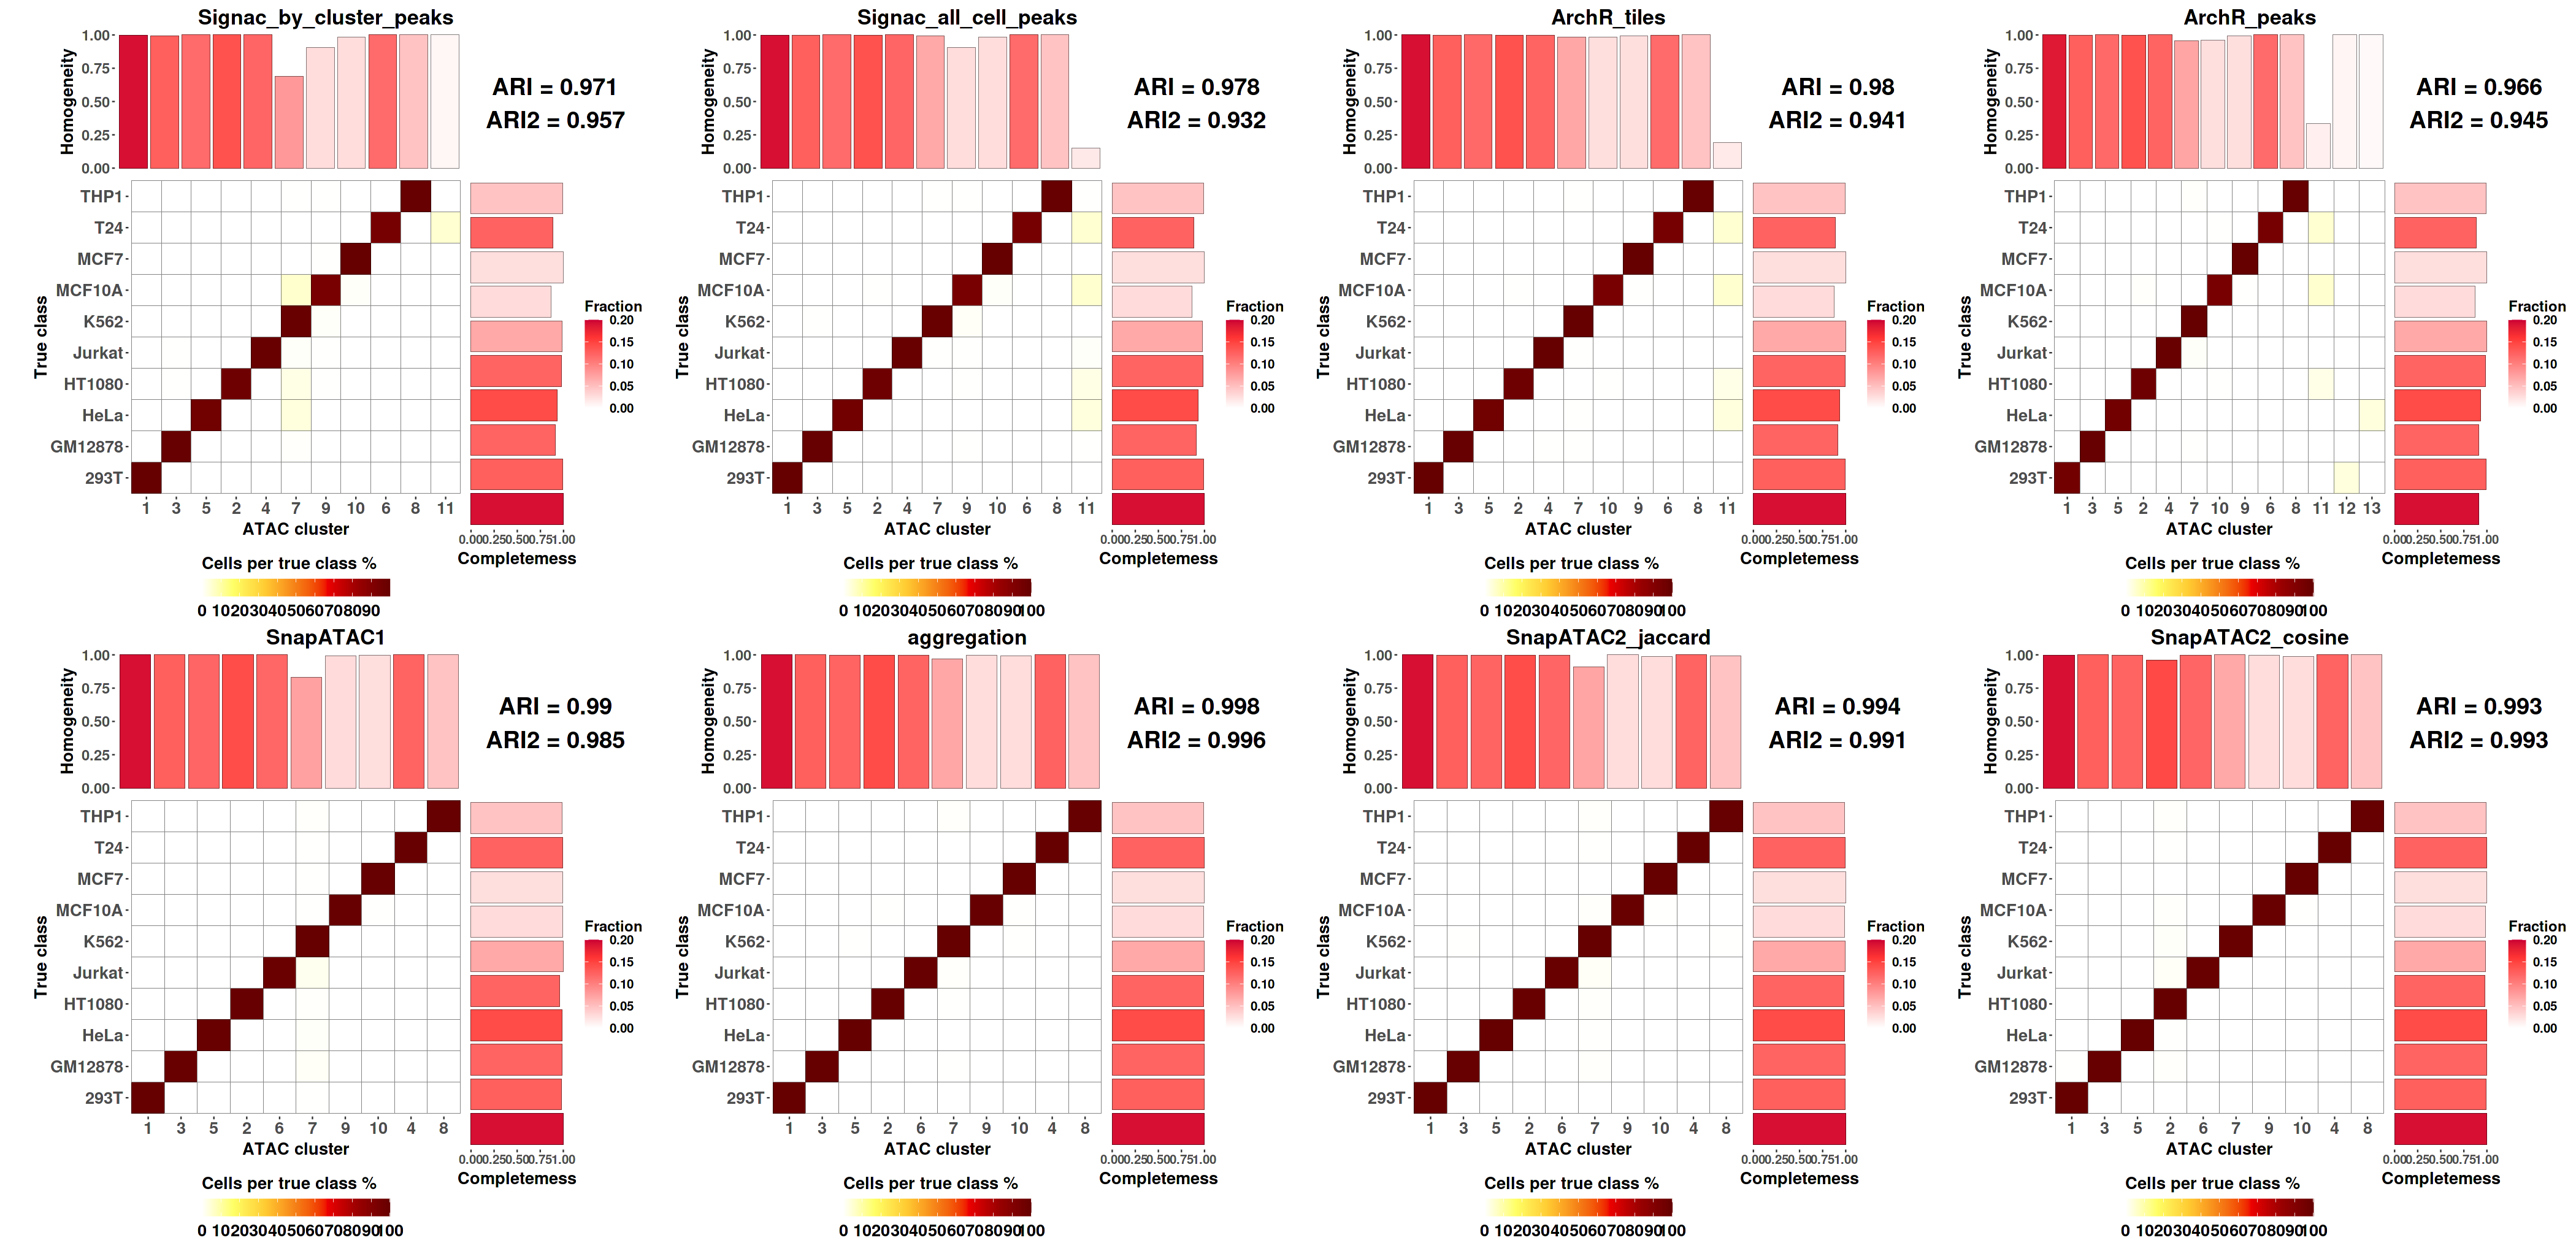

In [28]:
options(repr.plot.width=35, repr.plot.height=17)
layout1<-"
ABCD
EFGH
"

wrap_plots(p4 ,design = layout1) #guides = 'collect', 

In [29]:
pdf("cell_line_n15_cross_table.pdf", width=35, height=17)
print(wrap_plots(p4, design = layout1))
graphics.off()

# Atlas1

## Randomness

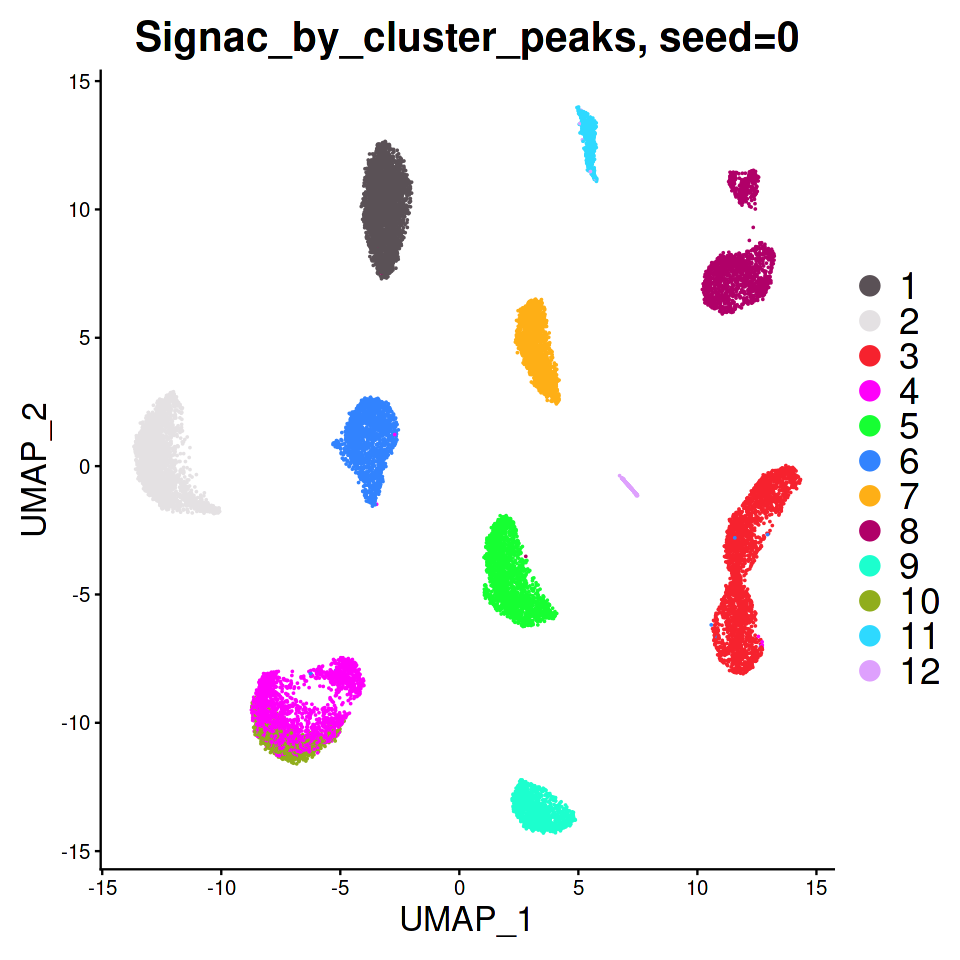

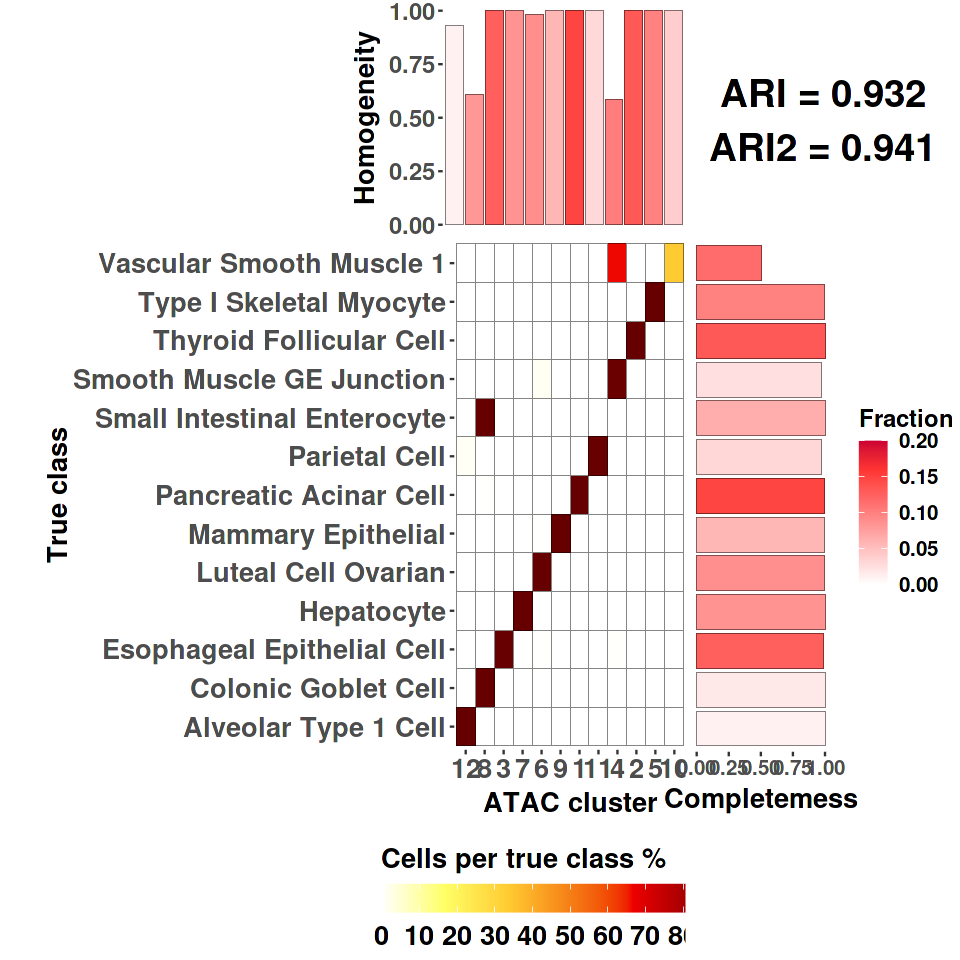

In [36]:
options(repr.plot.width=8, repr.plot.height=8)
sobj <- readRDS(paste0(root, "candidate1/candidate1/clustering/aggregation/default/0/default/15/sobj_SNN.RDS"))
ground_truth <- as.character(sobj$ground_truth)
ground_truth <- factor(gsub("_", " ", ground_truth))

sobj <- add_labels(sobj, paste0(root, "candidate1/candidate1/clustering/Signac/by_cluster_peaks/0/default/15/seed0/r0.25.tsv"), "barcode", "clusterings")
clustering <- sobj$ground_truth

p1 <- DimPlot(sobj, reduction = "umap", label = F, repel=T, 
    group.by = "ground_truth", cols="polychrome", pt.size=0.001)  + ggtitle("Signac_by_cluster_peaks, seed=0")  +
  theme(plot.title = element_text(face = "bold", size=24), 
        text=element_text(size=20), 
        legend.text = element_text(size = 22)) +
guides(color = guide_legend(override.aes = list(size = 5)))

p2 <- cross_table_plot(ground_truth , clustering, a=1.6, b=7.5, c=3.1) #, a=1.3, b=5.7, c=2

p1
p2

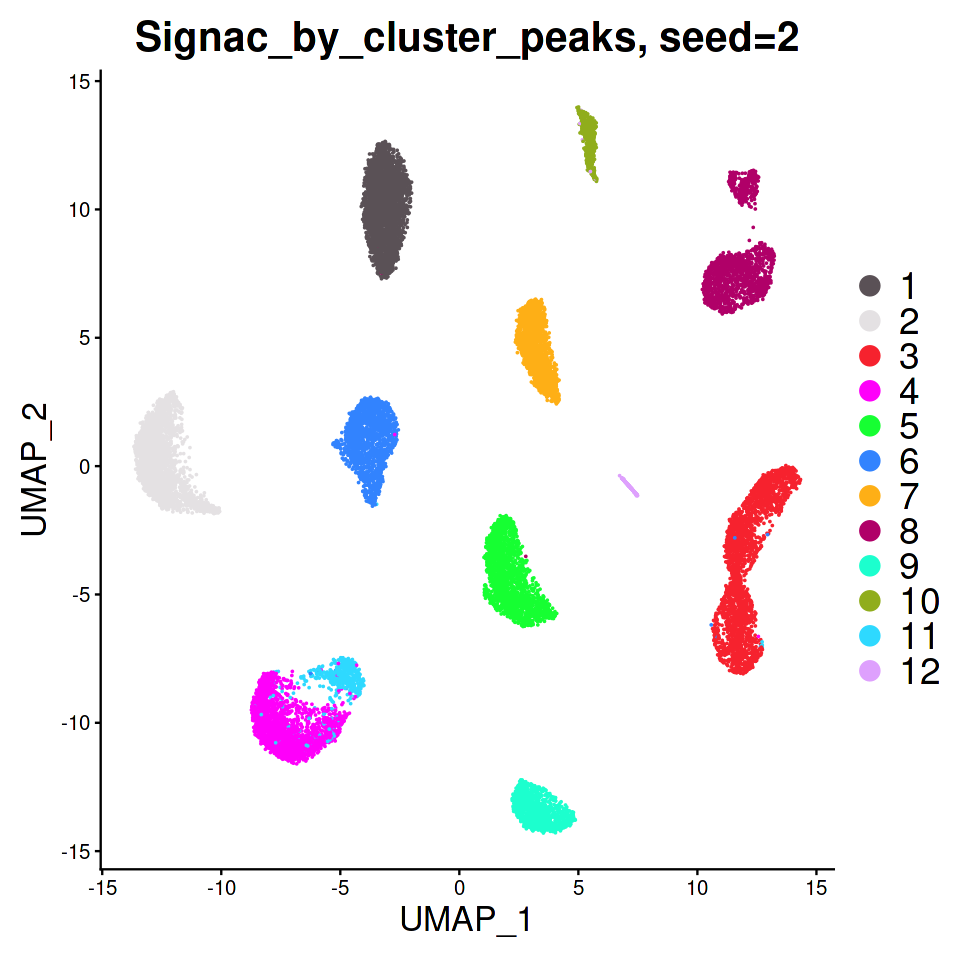

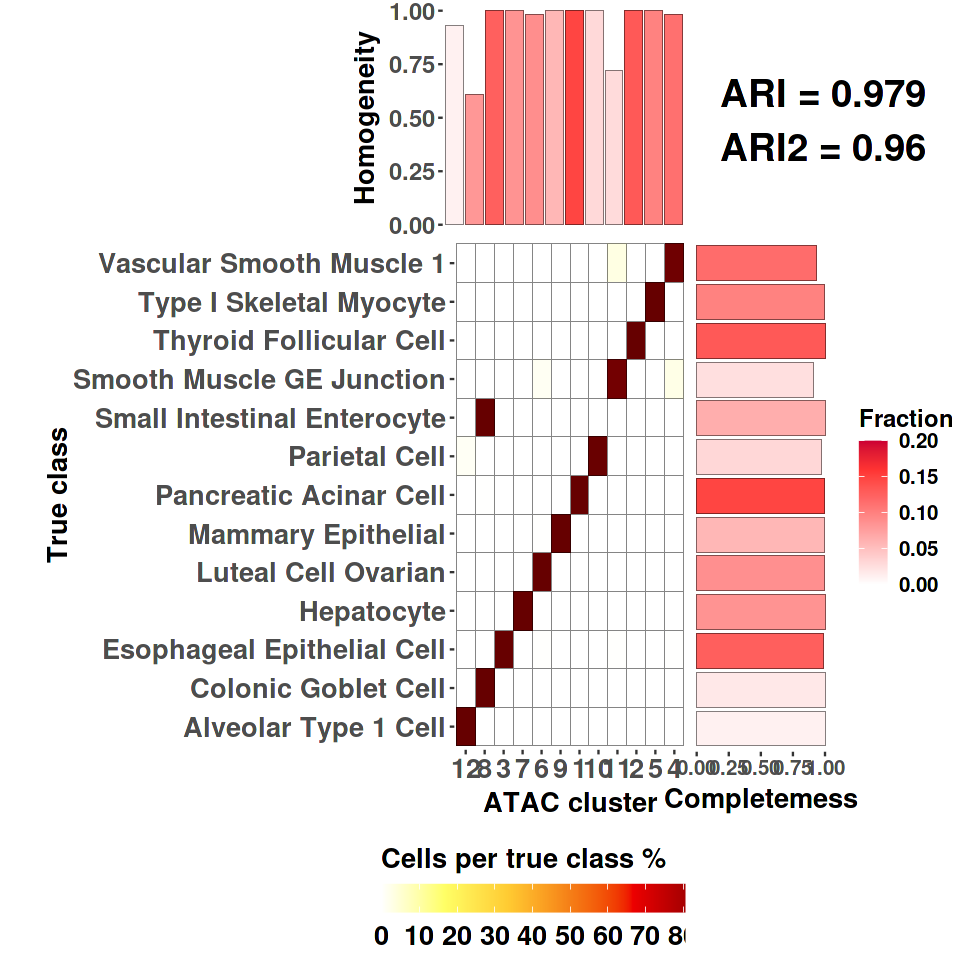

In [37]:
options(repr.plot.width=8, repr.plot.height=8)
sobj <- readRDS(paste0(root, "candidate1/candidate1/clustering/aggregation/default/0/default/15/sobj_SNN.RDS"))
ground_truth <- as.character(sobj$ground_truth)
ground_truth <- factor(gsub("_", " ", ground_truth))

sobj <- add_labels(sobj, paste0(root, "candidate1/candidate1/clustering/Signac/by_cluster_peaks/0/default/15/seed2/r0.25.tsv"), "barcode", "clusterings")
clustering <- sobj$ground_truth

p3 <- DimPlot(sobj, reduction = "umap", label = F, repel=T, 
    group.by = "ground_truth", cols="polychrome", pt.size=0.001)  + ggtitle("Signac_by_cluster_peaks, seed=2")  +
  theme(plot.title = element_text(face = "bold", size=24), 
        text=element_text(size=20), 
        legend.text = element_text(size = 22)) +
guides(color = guide_legend(override.aes = list(size = 5)))

p4 <- cross_table_plot(ground_truth , clustering, a=1.6, b=7.5, c=3.1) #

p3
p4

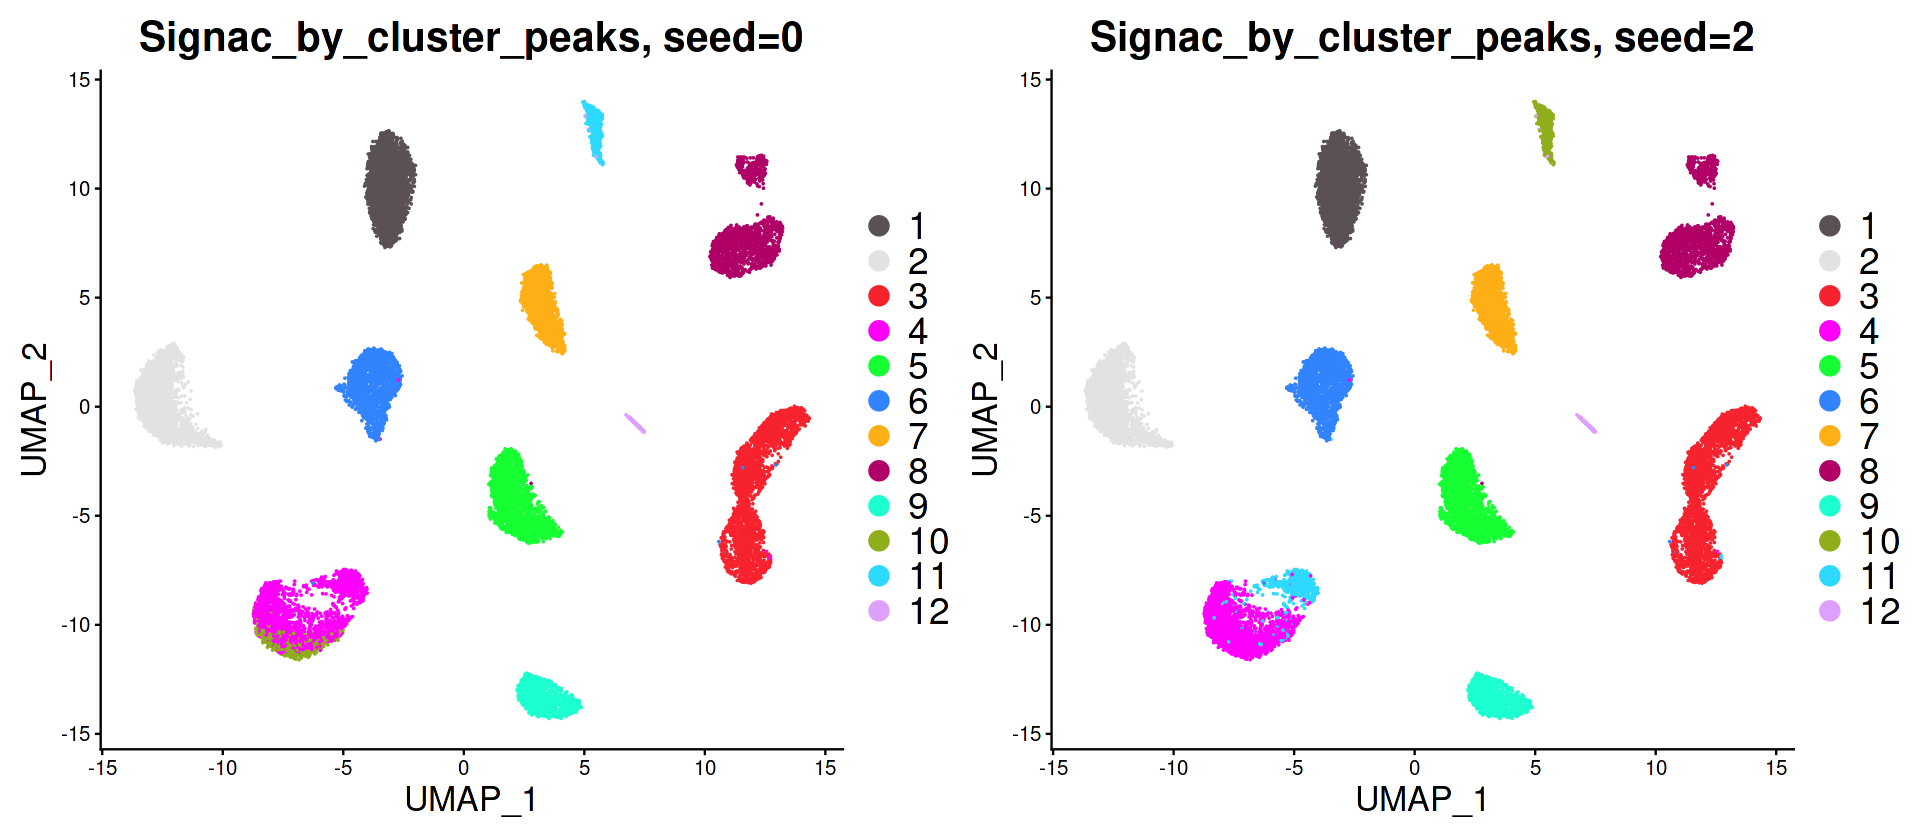

In [38]:
options(repr.plot.width=16, repr.plot.height=7)
layout1<-"
AB
"
wrap_plots(list(p1,p3), design = layout1)


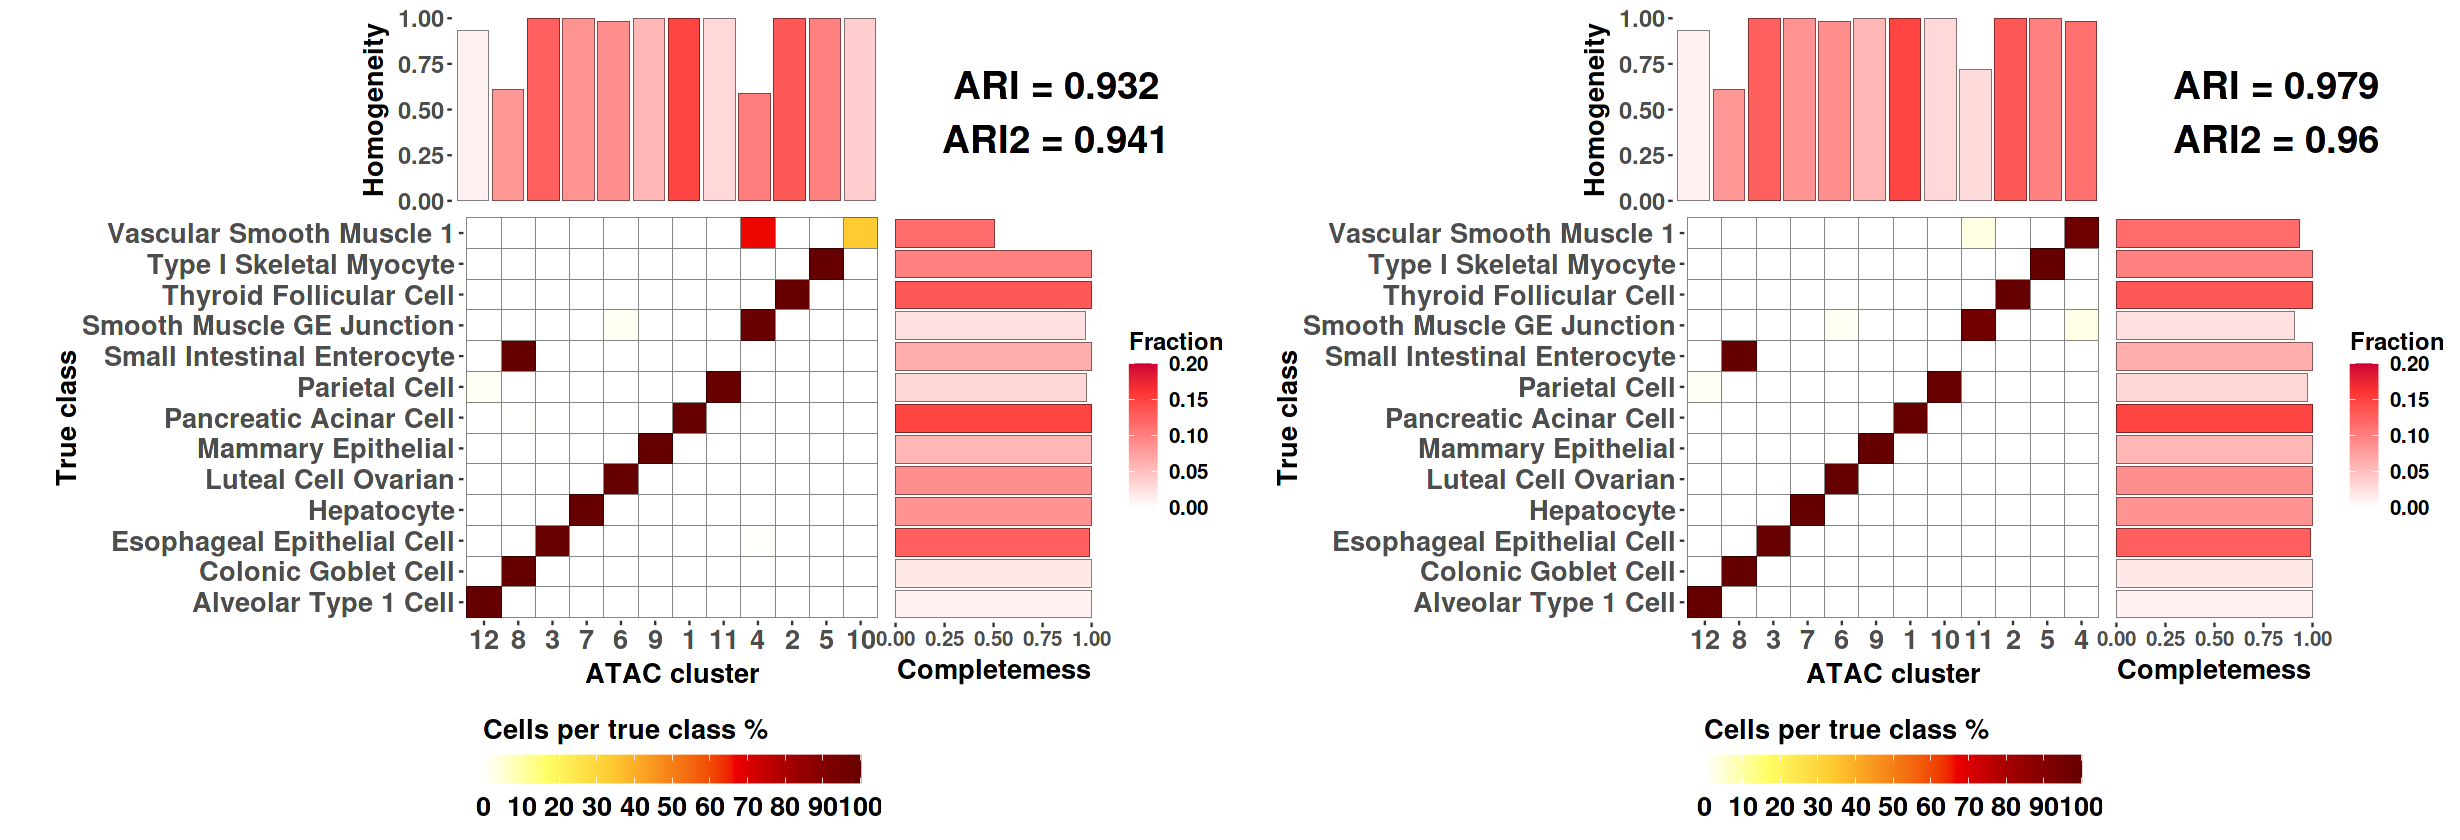

In [39]:
options(repr.plot.width=20.5, repr.plot.height=7)
layout1<-"
AB
"
wrap_plots(list(p2,p4), design = layout1)


In [40]:
pdf(paste0(ds, "randomness1.pdf"), width=16, height=7)
print(wrap_plots(list(p1,p3), design = layout1))
graphics.off()

pdf(paste0(ds, "randomness2.pdf"), width=20.5, height=7)
print(wrap_plots(list(p2,p4), design = layout1))
graphics.off()

# Atlas2

In [41]:
i <- 3
ds <- dataset_name[i]
k_optimal <- k_ls[i]
df_ds <- df_metrics %>% filter(dataset == ds)
setwd(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset_ls[i]))
df_umap <- unique(df_ds[,c('method','feature_type','tile_size',
                                  'distance','ndim','long_method',"snn_file")])
rownames(df_umap) <- NULL
dim(df_umap)

[1] 32  7

In [42]:
df_umap15 <- df_umap %>% filter(ndim==15)
a <- gsub("clustering", "evaluation", df_umap15$snn_file)
df_umap15$rds <- gsub("/sobj_SNN.RDS", "/latent_space_evaluation.RDS", a)

In [47]:
df_tmp <- df_umap15 %>% filter(long_method =="ArchR_tiles" | long_method == "SnapATAC2_jaccard")
p1 <- UmapPlot(df_tmp)

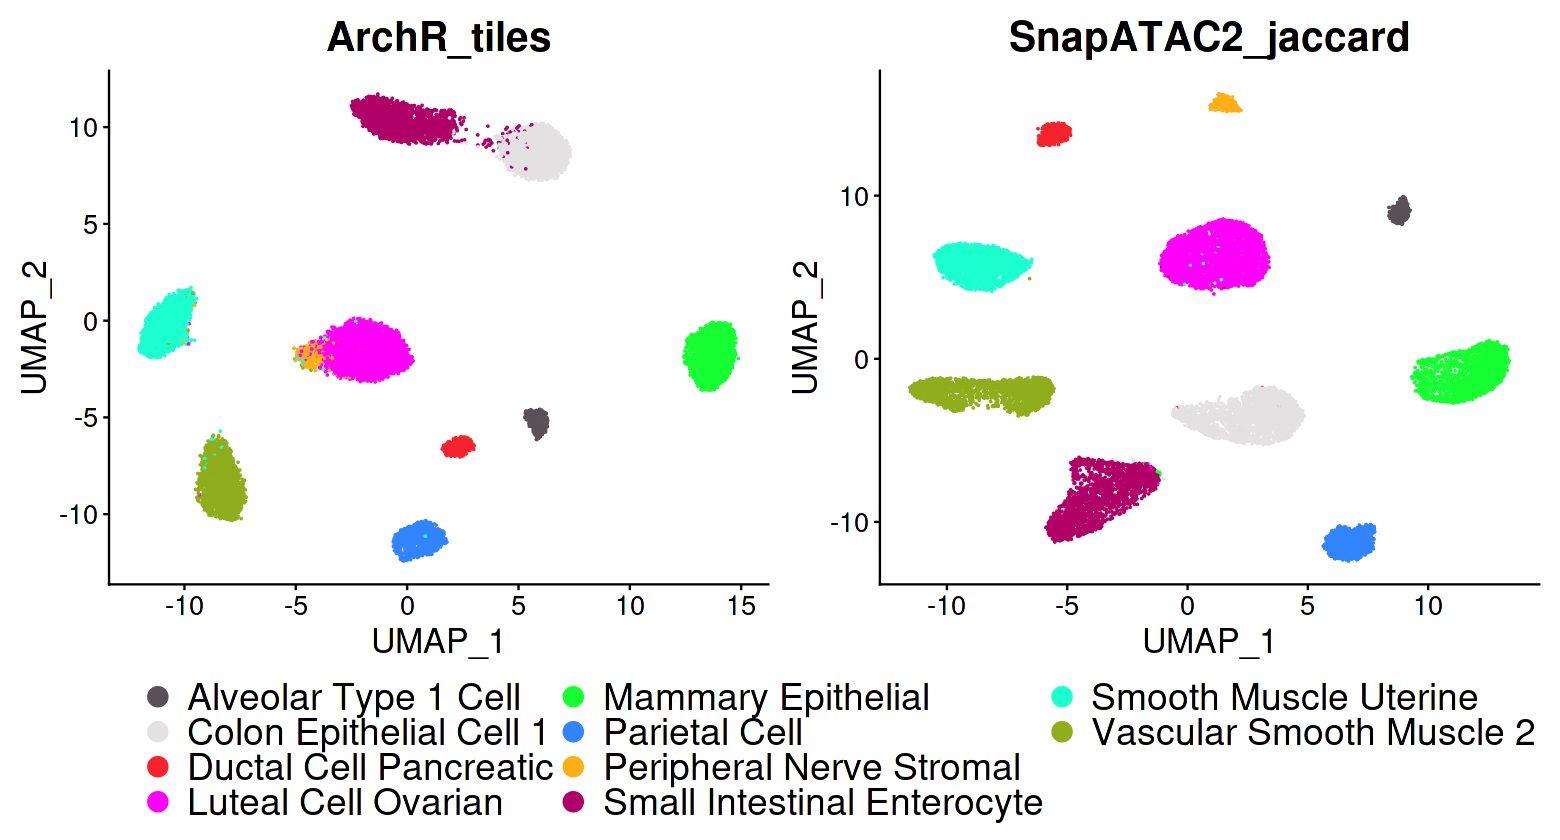

In [48]:
options(repr.plot.width=13, repr.plot.height=7)
layout1<-"
AB
"

wrap_plots(p1 ,design = layout1, guides = 'collect')  &
    guides(colour = guide_legend(nrow = 4, override.aes = list(size=5))) & theme(legend.position = 'bottom')

In [49]:
pdf(paste0(ds, "_archr_snapatac2_n15.pdf"), width=13, height=7)
print(wrap_plots(p1 ,guides = 'collect', design = layout1) &
    guides(colour = guide_legend(nrow = 4, override.aes = list(size=5))) & theme(legend.position = 'bottom'))
graphics.off()

In [50]:
df_tmp <- df_metrics_best %>% filter(dataset == ds & metric == "ARI" )
df_tmp <- df_tmp[!duplicated(df_tmp[, c("long_method")]), ]
df_tmp

n_clusters,metric,value,method,long_method,feature_type,tile_size,distance,ndim,resolution,rds_file,clustering_file,snn_file,seed,dataset,k_optimal,dataset2
<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>
10,ARI,0.9878429,Signac,Signac_all_cell_peaks,all_cell_peaks,0,default,15,0.250,candidate2/evaluation/Signac/all_cell_peaks/0/default/15/seed0/r0.25_evaluation.RDS,candidate2/clustering/Signac/all_cell_peaks/0/default/15/seed0/r0.25.tsv,candidate2/clustering/Signac/all_cell_peaks/0/default/15/sobj_SNN.RDS,0,Atlas2,10,candidate2
10,ARI,0.9904735,Signac,Signac_by_cluster_peaks,by_cluster_peaks,0,default,15,0.250,candidate2/evaluation/Signac/by_cluster_peaks/0/default/15/seed42/r0.25_evaluation.RDS,candidate2/clustering/Signac/by_cluster_peaks/0/default/15/seed42/r0.25.tsv,candidate2/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,42,Atlas2,10,candidate2
9,ARI,0.9421589,ArchR,ArchR_peaks,peaks,500,default,15,0.100,candidate2/evaluation/ArchR/peaks/500/default/15/seed42/r0.1_evaluation.RDS,candidate2/clustering/ArchR/peaks/500/default/15/seed42/r0.1.tsv,candidate2/clustering/ArchR/peaks/500/default/15/sobj_SNN.RDS,42,Atlas2,10,candidate2
10,ARI,0.9945216,SnapATAC1,SnapATAC1,default,5000,default,15,0.050,candidate2/evaluation/SnapATAC1/default/5000/default/15/seed0/r0.05_evaluation.RDS,candidate2/clustering/SnapATAC1/default/5000/default/15/seed0/r0.05.tsv,candidate2/clustering/SnapATAC1/default/5000/default/15/sobj_SNN.RDS,0,Atlas2,10,candidate2
11,ARI,0.9891915,aggregation,aggregation,default,0,default,15,0.250,candidate2/evaluation/aggregation/default/0/default/15/seed2/r0.25_evaluation.RDS,candidate2/clustering/aggregation/default/0/default/15/seed2/r0.25.tsv,candidate2/clustering/aggregation/default/0/default/15/sobj_SNN.RDS,2,Atlas2,10,candidate2
10,ARI,0.9970627,SnapATAC2,SnapATAC2_jaccard,default,500,jaccard,15,0.050,candidate2/evaluation/SnapATAC2/default/500/jaccard/15/seed0/r0.05_evaluation.RDS,candidate2/clustering/SnapATAC2/default/500/jaccard/15/seed0/r0.05.tsv,candidate2/clustering/SnapATAC2/default/500/jaccard/15/sobj_SNN.RDS,0,Atlas2,10,candidate2
10,ARI,0.9955335,SnapATAC2,SnapATAC2_cosine,default,500,cosine,15,0.050,candidate2/evaluation/SnapATAC2/default/500/cosine/15/seed0/r0.05_evaluation.RDS,candidate2/clustering/SnapATAC2/default/500/cosine/15/seed0/r0.05.tsv,candidate2/clustering/SnapATAC2/default/500/cosine/15/sobj_SNN.RDS,0,Atlas2,10,candidate2
9,ARI,0.9376304,ArchR,ArchR_tiles,tiles,500,default,15,0.175,candidate2/evaluation/ArchR/tiles/500/default/15/r0.175_evaluation.RDS,candidate2/clustering/ArchR/tiles/500/default/15/r0.175.tsv,candidate2/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS,0,Atlas2,10,candidate2


In [52]:
df_tmp <- df_metrics %>% filter(dataset == ds & metric == "ARI" & long_method == "ArchR_tiles" & resolution==0.225)
df_tmp <- df_tmp[!duplicated(df_tmp[, c("long_method", "resolution")]), ]
df_tmp$clustering_file <- "candidate2/clustering/ArchR/tiles/500/default/15/0/r0.225.tsv"

In [54]:
p2 <- UmapPlot(df_tmp, add_clustering=TRUE)

$ArchR_tiles


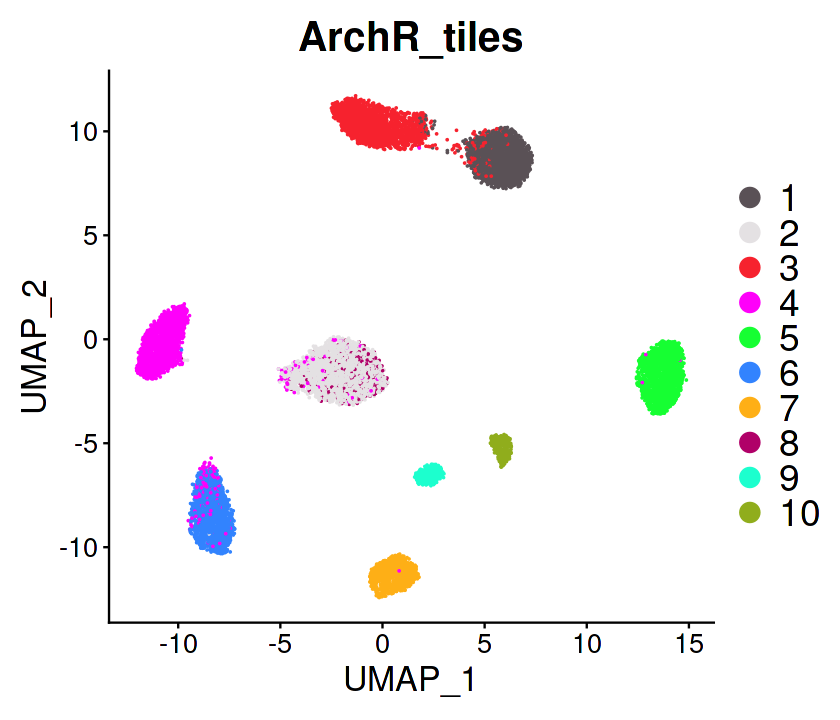

In [55]:
options(repr.plot.width=7, repr.plot.height=6)
p2

In [57]:
pdf(paste0(ds, "_archr_umap_clustering_k=10.pdf"), width=7, height=6)
print(p2)
graphics.off()

$ArchR_tiles


# Chen_2019

In [58]:
i <- 5
ds <- dataset_name[i]
k_optimal <- k_ls[i]
df_ds <- df_metrics %>% filter(dataset == ds)
setwd(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset_ls[i]))
df_umap <- unique(df_ds[,c('method','feature_type','tile_size',
                                  'distance','ndim','long_method',"snn_file")])
rownames(df_umap) <- NULL
dim(df_umap)

[1] 32  7

In [59]:
df_umap15 <- df_umap %>% filter(ndim==15)
a <- gsub("clustering", "evaluation", df_umap15$snn_file)
df_umap15$rds <- gsub("/sobj_SNN.RDS", "/latent_space_evaluation.RDS", a)

Plot only 2 methods for discussion

In [60]:
df_umap_tmp <- df_umap15 %>% filter(long_method %in%c("ArchR_peaks", "ArchR_tiles")) # "SnapATAC1", "aggregation" "Signac_by_cluster_peaks", "Signac_all_cell_peaks","ArchR_peaks", "ArchR_tiles"

In [63]:
p0 <- UmapPlot(df_umap_tmp, s=0.5)

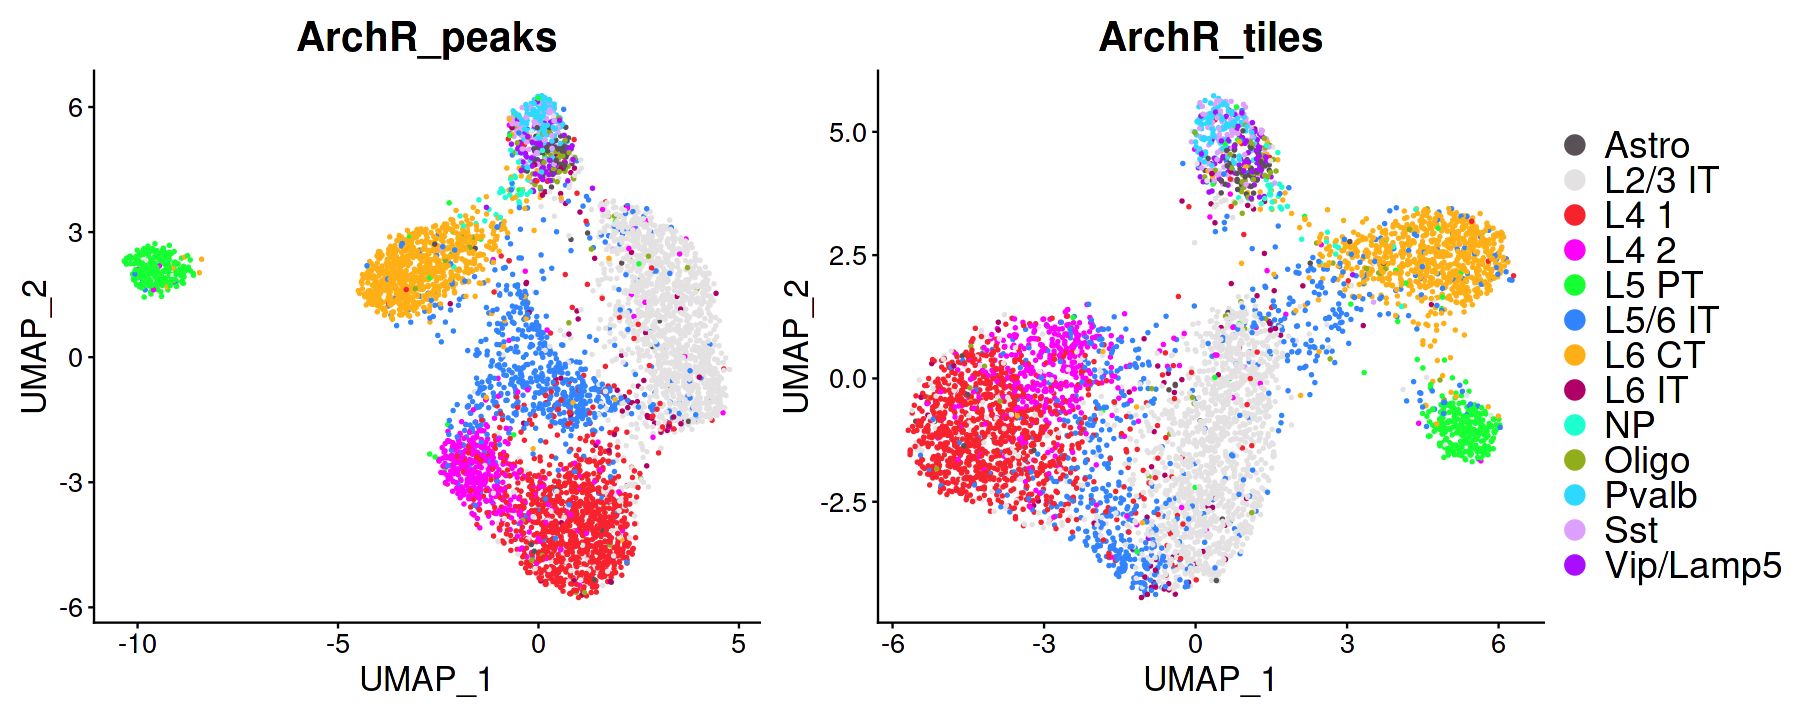

In [64]:
options(repr.plot.width=15, repr.plot.height=6)
layout1<-"
AB
"
wrap_plots(p0, guides = 'collect', design = layout1)

In [65]:
pdf(paste0( ds, "_n15_archr.pdf"), width=15, height=6)
print(wrap_plots(p0 ,guides = 'collect', design = layout1))
graphics.off()

# PBMC

In [66]:
i <- 6
ds <- dataset_name[i]
k_optimal <- k_ls[i]
df_ds <- df_metrics %>% filter(dataset == ds)
setwd(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset_ls[i]))
df_umap <- unique(df_ds[,c('method','feature_type','tile_size',
                                  'distance','ndim','long_method',"snn_file")])
rownames(df_umap) <- NULL
dim(df_umap)

[1] 32  7

In [67]:
df_umap15 <- df_umap %>% filter(ndim==15)
a <- gsub("clustering", "evaluation", df_umap15$snn_file)
df_umap15$rds <- gsub("/sobj_SNN.RDS", "/latent_space_evaluation.RDS", a)

In [68]:
df_tmp <- df_umap15 %>% filter(long_method %in% c("aggregation", "SnapATAC2_cosine"))
p0 <- UmapPlot(df_tmp, s=0.05)

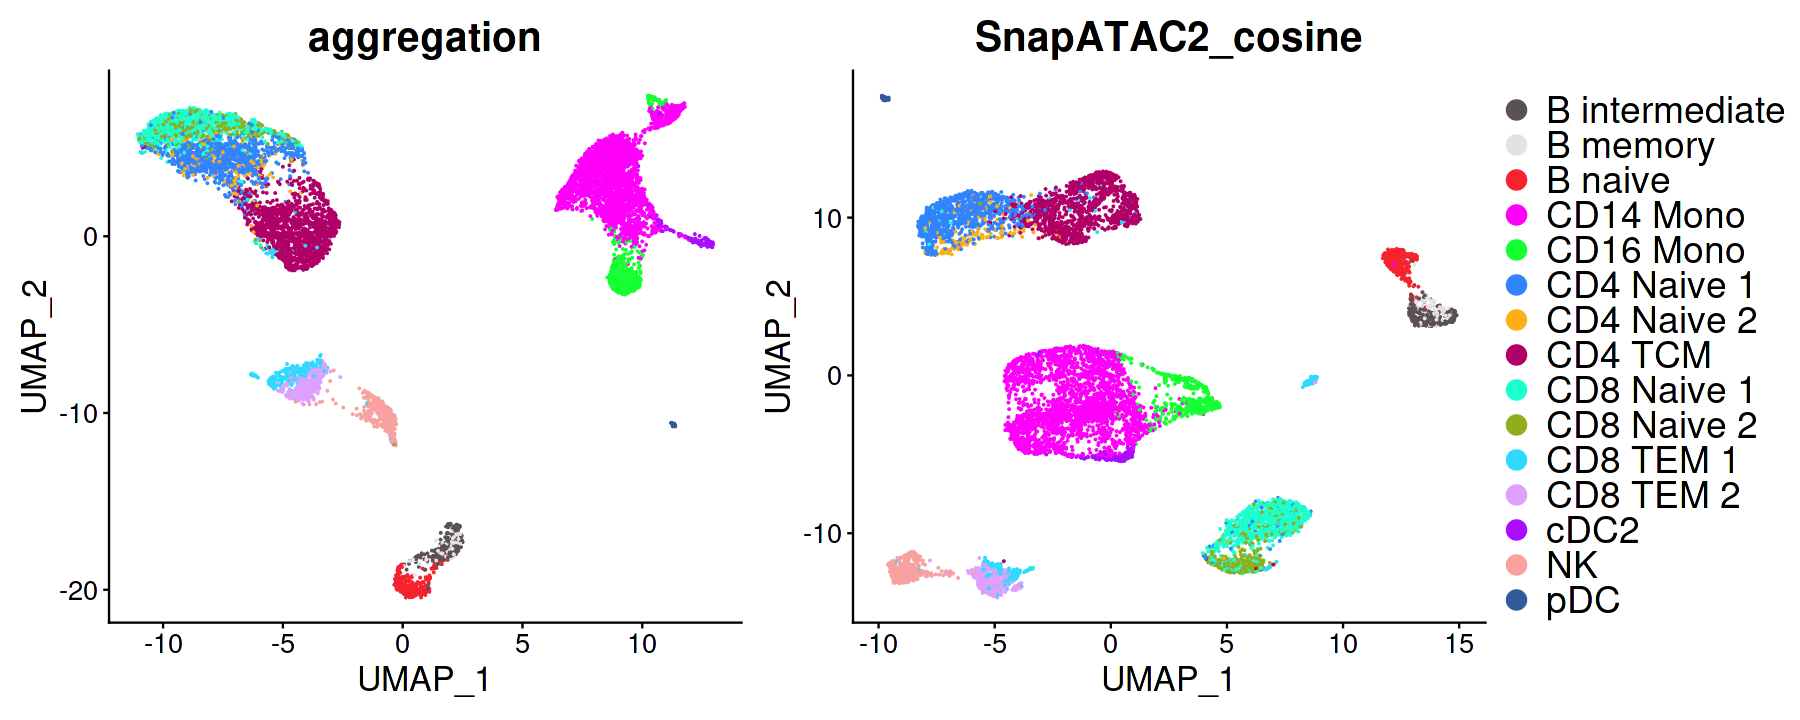

In [69]:
options(repr.plot.width=15, repr.plot.height=6)
layout1<-"
AB
"

wrap_plots(p0, guides = 'collect', design = layout1)

In [70]:
pdf(paste0(ds, "_signac_snapatac2_n15_umap.pdf"), width=15, height=6)
print(wrap_plots(p0 ,guides = 'collect', design = layout1))
graphics.off()